# Summary
## Notebook Introduction
This executable document (it is called a [Jupyter notebook](http://ipython.org/notebook.html)) 
will allow you to interactively explore your acquired data and generate plots for the lab reports.

If you are reading this notebook online, please refer to 
[this quick-start guide](http://jupyter-notebook-beginner-guide.readthedocs.org) 
for instructions on how to install the required software and run the notebook 
on your machine. 

If it's the first time you are using a Jupyter notebook, please click on 
*Help* -> *User Interface Tour* for a quick tour of the interface.

In this notebook there are "text cells", such as this paragraph, and "code cells",
containing the code to be executed. To execute a code cell, select it and 
press SHIFT+ENTER. To edit a code cell it must be selected and with a green 
frame around it.

## Data Pre-processing
Your acquired data will be available in the Excel spreadsheet format.  For processing data within Jupyter notebook you will need to convert every Excel sheet into a CSV file.  Further, it is recommended that you add simple column names to your data file.  Please avoid names with spaces or non-alphanumeric characters.  Column names like 'Time' or 'pH' will work well, but names like 'Time (sec)' or '10^-pH' will likely cause problems.  Save your CSV files on a USB flash drive or cloud storage of your choice. 

## Working with Data
This notebook will focus on 1) loading a data file, 2) generating a simple plot of data, and 3) using gaussian and exponential models to fit the data.

## 0. Initializing Notebook
In this part we run a script that imports necessary modules and defines functions like choose_file() below.

In [1]:
%run labtools.py

SyntaxError: invalid syntax (labtools.py, line 1)

## 1. Loading a data file

There are several methods for loading data files into Jupyter notebook.  Here we will use a graphical user interface (GUI) approach to simplify file selection.  An alternate approach is to load data from using built-in functions/methods (eg. `numpy.loadtxt()` or `pandas.read_csv()`)

### Select file

In [25]:
filename = choose_file()

### Load file


In [26]:
data = pd.read_csv(filename)
data

,Unnamed: 0,conc,time
0,0,2.994109,0.0
1,1,2.931366,0.1
2,2,2.513379,0.2
3,3,2.173372,0.3
4,4,1.637637,0.4
5,5,1.484634,0.5
6,6,1.593056,0.6
7,7,1.652162,0.7
8,8,1.208850,0.8
9,9,0.902282,0.9


### Display Basic Stats

In [27]:
data.describe()

,Unnamed: 0,conc,time
count,50.00000,50.000000,50.000000
mean,24.50000,0.891125,2.450000
std,14.57738,0.632582,1.457738
min,0.00000,0.162653,0.000000
25%,12.25000,0.520901,1.225000
50%,24.50000,0.691594,2.450000
75%,36.75000,0.967204,3.675000
max,49.00000,2.994109,4.900000


In [19]:
xdata = np.arange(0,5,0.1)

In [20]:
def fexp(x,a,b,c):
    return a*np.exp(-b*x)+c

def fgau(x,a,b,c):
    return a*np.exp(-b*x**2)+c

def ddata(x,ns):
    noise = ns*np.random.randn(len(x))
    return fexp(x,2.5,1.3,0.5) + noise

ydata = ddata(xdata,0.2)

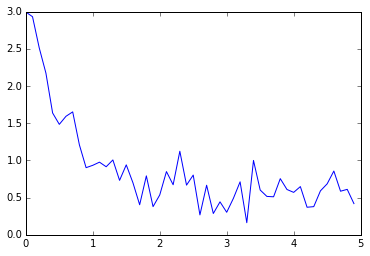

In [21]:
plt.plot(xdata,ydata)

In [22]:
mydata = pd.DataFrame({'time': xdata, 'conc': ydata})

In [24]:
mydata.to_csv('test01.csv')

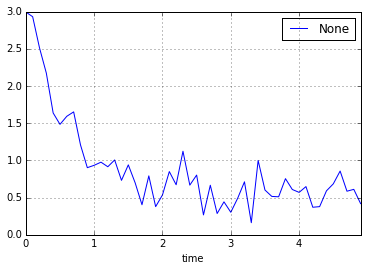

In [28]:
mydata.plot(x='time',y='conc')

If the next cell output shows "OK" then the execution is terminated.

In [ ]:
print('OK')